# Model preparation : 

## Data verification and preprocessing

To begin data verification and preprocessing, we imported the necessary packages for this phase and also imported the file containing the already prepared features.

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
tuna = pd.read_csv(r'.\data_features.csv')
tuna.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,venturebeat.com,0,0,1,4,0,0,0,1,0,0,1,1,1,0,0,0,0
1,allegro.pl,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,allegro.pl,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tinnhanh360.net,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0
4,metro.co.uk,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0


To familiarize ourselves with the data, several DataFrame methods will be applied to the data.

In [3]:
#Checking the shape of the dataset
tuna.shape

(9480, 18)

In [4]:
#Listing the features of the dataset
tuna.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'Prefix/Suffix', 'TinyURL', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
tuna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9480 entries, 0 to 9479
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         9480 non-null   object
 1   Have_IP        9480 non-null   int64 
 2   Have_At        9480 non-null   int64 
 3   URL_Length     9480 non-null   int64 
 4   URL_Depth      9480 non-null   int64 
 5   Redirection    9480 non-null   int64 
 6   https_Domain   9480 non-null   int64 
 7   Prefix/Suffix  9480 non-null   int64 
 8   TinyURL        9480 non-null   int64 
 9   DNS_Record     9480 non-null   int64 
 10  Web_Traffic    9480 non-null   int64 
 11  Domain_Age     9480 non-null   int64 
 12  Domain_End     9480 non-null   int64 
 13  iFrame         9480 non-null   int64 
 14  Mouse_Over     9480 non-null   int64 
 15  Right_Click    9480 non-null   int64 
 16  Web_Forwards   9480 non-null   int64 
 17  Label          9480 non-null   int64 
dtypes: int64(17), object(1)
memo

Some plots and graphs are displayed to understand the distribution of the data and the relationship between the features. 

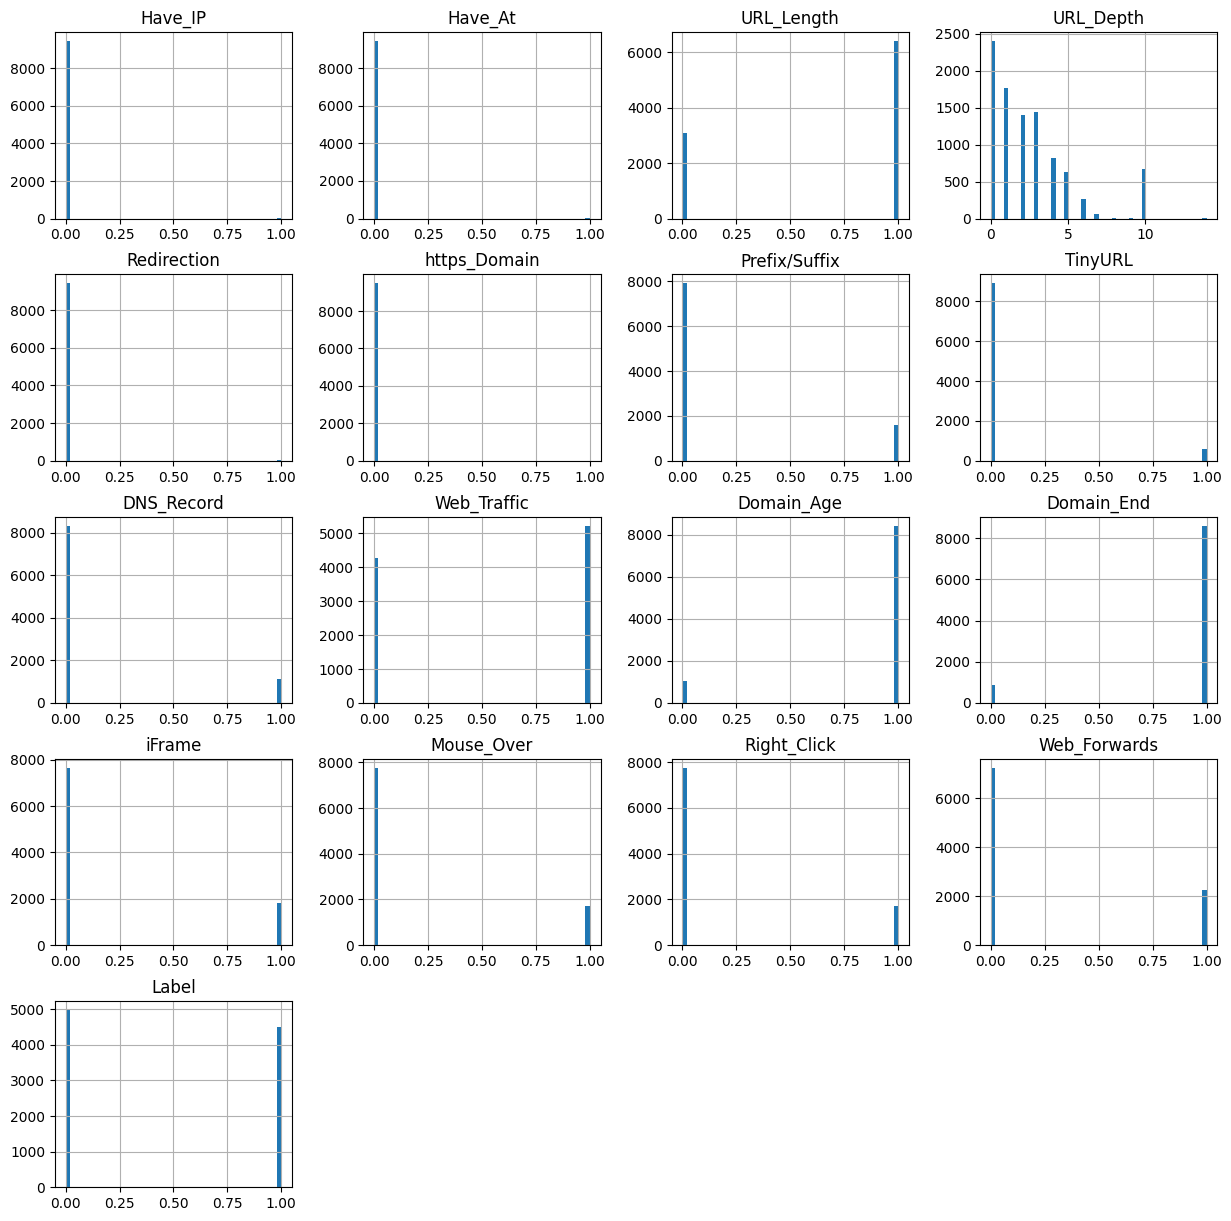

In [6]:
#Plotting the data distribution
tuna.hist(bins = 50,figsize = (15,15))
plt.show()

## Data preprocessing :

Here, we clean the data by applying data preprocessing techniques and transform them for use in the models.

In [7]:
tuna.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000,9480.000000
mean,0.003692,0.005907,0.675527,2.563608,0.006118,0.000105,0.166245,0.060865,0.120464,0.551055,0.890506,0.909388,0.193038,0.181118,0.181435,0.236076,0.474684
std,0.060653,0.076635,0.468202,2.708149,0.077983,0.010271,0.372320,0.239095,0.325521,0.497413,0.312274,0.287071,0.394703,0.385136,0.385398,0.424692,0.499385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The results obtained above show that most of the data consists of 0s and 1s, except for the 'Domain' and 'URL_Depth' columns. The 'Domain' column is not meaningful for training the machine learning model. Therefore, we will remove the 'Domain' column from the dataset.

In [9]:
#Dropping the Domain column
dfsa = tuna.drop(['Domain'], axis = 1).copy()

That leaves us with 16 features and one target column. The maximum value of 'URL_Depth' is 20. Based on my understanding, there is no need to modify this column.

In [10]:
#checking the data for null or missing values
dfsa.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
Prefix/Suffix    0
TinyURL          0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.


In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
dfsa = dfsa.sample(frac=1).reset_index(drop=True)
dfsa.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,Prefix/Suffix,TinyURL,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,10,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1
2,0,0,1,5,0,0,0,0,0,0,1,1,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1
4,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0


In our dataset above, it is clear that there are no missing values.
Thus, the data has been thoroughly preprocessed and is ready for training.

## data splitting : 

In [12]:
# Sepratating & assigning features and target columns to X & y
y = dfsa['Label']  #target variable
X = dfsa.drop('Label',axis=1)   #independent variable

In [13]:
# Checking the shape for X, y variable 
X.shape, y.shape

((9480, 16), (9480,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20%
X_train.shape, X_test.shape

((7584, 16), (1896, 16))

##  Machine Learning Models & Training

Based on the dataset above, it's clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This dataset falls under the classification problem, as the input URL is classified as either phishing (1) or legitimate (0). The supervised machine learning models (classification) considered for training the dataset in this notebook are as follows:

- Decision Tree
- Random Forest
- Multilayer Perceptrons
- XGBoost
- Autoencoder Neural Network
- Support Vector Machines (SVM)

In [15]:
#importing packages
from sklearn.metrics import accuracy_score

In [16]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## 1. Desicion tree : 

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/then questions, leading to a decision. Learning a decision tree means learning the sequence of if/then questions that most quickly lead to the correct answer.

In the context of machine learning, these questions are called tests (not to be confused with the test set, which is the data we use to test how well our model generalizes). To construct a tree, the algorithm explores all possible tests and finds the one that is most informative about the target variable.

In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

### Performance Evaluation:

In [19]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.955
Decision Tree: Accuracy on test Data: 0.957


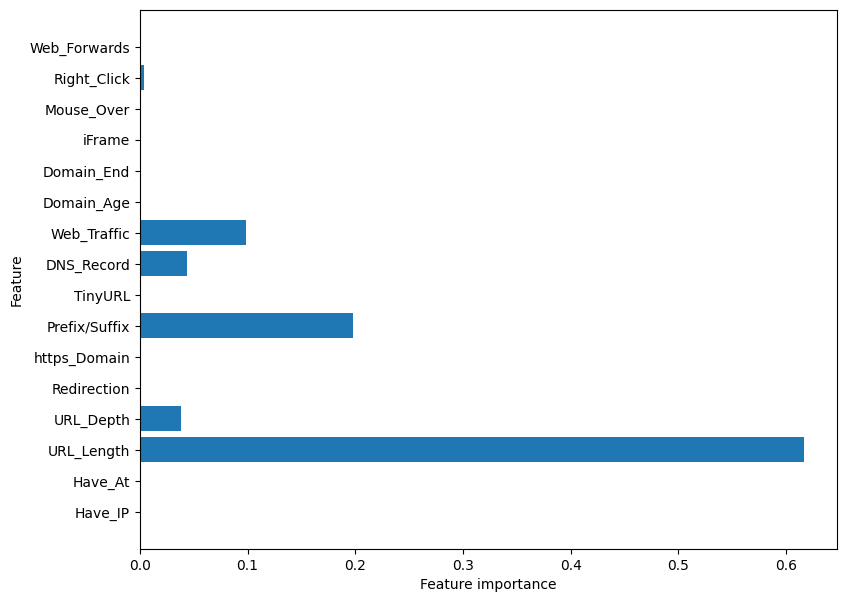

In [20]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Storing the results:

In [21]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

## 2. Random forest : 

Random forests for both regression and classification are currently among the most widely used machine learning methods. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do well on its own prediction, but it's likely to overfit some part of the data.

By building many trees, all performing well and overfitting in different ways, we can reduce overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often perform well with little parameter tuning, and do not require data scaling.

In [22]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Performance Evaluation:

In [24]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.962
Random forest: Accuracy on test Data: 0.965


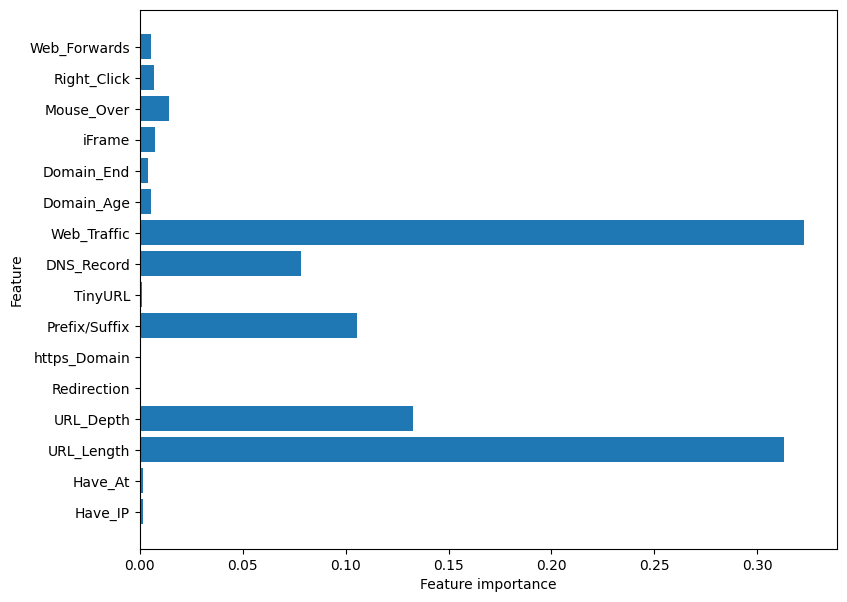

In [26]:
#checking the feature  importance  in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()



Storing the results:


In [27]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

## 3. Multilayer Perceptrons (MLPs): Deep Learning

Multilayer Perceptrons (MLPs), also known as feedforward neural networks (or classical neural networks), are neural network models that can be applied to both classification and regression problems.

MLPs can be seen as generalizations of linear models that perform multiple processing steps to arrive at a decision.

In [28]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [29]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [30]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.979
Multilayer Perceptrons: Accuracy on test Data: 0.981




Storing the results:


In [31]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

## 4. XGBoost Classifier

XGBoost is one of the most popular machine learning algorithms nowadays. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task to be accomplished, whether it's regression or classification, XGBoost is an implementation of the gradient boosting algorithm designed for speed and performance.

In [33]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [51]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)



Performance Evaluation:


In [52]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.980
XGBoost : Accuracy on test Data: 0.980


Storing the results:

In [36]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## 5. Autoencoder Neural Network

An autoencoder is a neural network that has the same number of neurons in its input and output layers. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Since there are fewer neurons, the autoencoder must learn to encode the input into the fewer hidden neurons. The predictors (x) and the output (y) are exactly the same in an autoencoder.

In [37]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [38]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │             238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             272 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,294 (5.05 KB)

 Trainable params: 1,294 (5.05 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2876 - loss: 3.0836 - val_accuracy: 0.5465 - val_loss: 0.8159
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5424 - loss: 0.4972 - val_accuracy: 0.5267 - val_loss: -0.3341
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5398 - loss: -0.3350 - val_accuracy: 0.5728 - val_loss: -0.5083
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5576 - loss: -0.4243 - val_accuracy: 0.5709 - val_loss: -0.5859
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5618 - loss: -0.5446 - val_accuracy: 0.5695 - val_loss: -0.6600
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5575 - loss: -0.6552 - val_accuracy: 0.5471 - val_loss: -0.7193
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: -0.6740 - val_accuracy: 0.6744 - val_loss: -1.3133
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6186 - loss: -1.2849 - val_accuracy: 0.617



Performance Evaluation:


In [40]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5846 - loss: -1.4954
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5726 - loss: -1.5298

Autoencoder: Accuracy on training Data: 0.581
Autoencoder: Accuracy on test Data: 0.581


Storing the results:

In [41]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

## 6. Support Vector Machines

In machine learning, Support Vector Machines (SVMs), also known as support vector networks, are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM learning algorithm constructs a model that assigns new examples to one of the two categories, making it a non-probabilistic binary linear classifier.

In [42]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [43]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)



Performance Evaluation:


In [44]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.954
SVM : Accuracy on test Data: 0.951


Storing the results:

In [45]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

##  Comparision of Models

To compare the performance of the models, a DataFrame is created. The columns of this DataFrame are the lists created to store the model results.

In [46]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.955,0.957
1,Random Forest,0.962,0.965
2,Multilayer Perceptrons,0.979,0.981
3,XGBoost,0.980,0.980
4,AutoEncoder,0.581,0.581
5,SVM,0.954,0.951


In [48]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.979,0.981
3,XGBoost,0.980,0.980
1,Random Forest,0.962,0.965
0,Decision Tree,0.955,0.957
5,SVM,0.954,0.951
4,AutoEncoder,0.581,0.581


For the comparison above, it's clear that the Multilayer Perceptron classifier performs well with this dataset.

In [53]:
# save Multilayer_perceptrons model to file
import pickle
pickle.dump(mlp, open("Multilayer_perceptrons.pickle.dat", "wb"))

In [54]:
loaded_model = pickle.load(open("Multilayer_perceptrons.pickle.dat", "rb"))
loaded_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

At this stage, our model is ready and can be used for production.